<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation---Cleaning-&amp;-Flagging" data-toc-modified-id="Data-Preparation---Cleaning-&amp;-Flagging-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation - Cleaning &amp; Flagging</a></span><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Attribute-Description" data-toc-modified-id="Attribute-Description-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Attribute Description</a></span></li><li><span><a href="#Detection-of-Missing-Values" data-toc-modified-id="Detection-of-Missing-Values-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Detection of Missing Values</a></span></li><li><span><a href="#Flagging-of-Missing-Values" data-toc-modified-id="Flagging-of-Missing-Values-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Flagging of Missing Values</a></span></li></ul></li></ul></div>

# Analysis of Risk Factors in Heart Diseases
## Data Preparation - Cleaning & Flagging

This jupyter notebook contains the cleaning and flagging part of the data preparation part with Python.

The imputation of missing values, which is also part of the data preparation, is contained in another jupyter notebook since that step was done with R.


---
**Project Title:** Analysis of Risk Factors in Heart Diseases

**Program:** MSc. Applied Information & Data Science

**Supervisor:** Philip Hochuli

**Authors:** Manuel Frei, Nico Schubiger, Anna-Lena Klaus

**Date:** 05.11.2021

---

### Data Cleaning

In [1]:
#loading packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing data 
heart_cleveland = pd.read_csv("https://gitlab.com/mfrrr/hslu_healthcare/-/raw/main/Data/heart_cleveland_303x14.csv")
heart_hungary = pd.read_csv("https://gitlab.com/mfrrr/hslu_healthcare/-/raw/main/Data/heart_hungary_294x14.csv")
heart_longbeach = pd.read_csv("https://gitlab.com/mfrrr/hslu_healthcare/-/raw/main/Data/heart_longbeach_200x14.csv")
heart_switzerland = pd.read_csv("https://gitlab.com/mfrrr/hslu_healthcare/-/raw/main/Data/heart_switzerland_123x14.csv")

In [3]:
#transforming data into data frames
df_cleveland = pd.DataFrame(heart_cleveland)
df_hungary = pd.DataFrame(heart_hungary)
df_longbeach = pd.DataFrame(heart_longbeach)
df_switzerland = pd.DataFrame(heart_switzerland)

In [4]:
#adding additional column with location names
location = ["Cleveland" for i in range(303)]
df_cleveland.insert(0, "location", location)

location = ["Hungary" for i in range(294)]
df_hungary.insert(0, "location", location)

location = ["Long Beach" for i in range(200)]
df_longbeach.insert(0, "location", location)

location = ["Switzerland" for i in range(123)]
df_switzerland.insert(0, "location", location)

In [5]:
#combining data frames
df_heart = pd.concat([df_cleveland, df_hungary, df_longbeach, df_switzerland], ignore_index=True)

In [6]:
#replacing missing values ('?') with 'NaN'
df_heart = df_heart.replace(["?"], np.NaN)

In [7]:
#aligning variable data types to float
for col in df_heart.columns[1:]:
        df_heart[col] = pd.to_numeric(df_heart[col], downcast="float")

In [8]:
#checking combined data set after cleaning
df_heart

location   age  sex   cp  trestbps   chol  fbs  restecg  thalach  \
0      Cleveland  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0   
1      Cleveland  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0   
2      Cleveland  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0   
3      Cleveland  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0   
4      Cleveland  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0   
..           ...   ...  ...  ...       ...    ...  ...      ...      ...   
915  Switzerland  70.0  1.0  4.0     115.0    0.0  0.0      1.0     92.0   
916  Switzerland  70.0  1.0  4.0     140.0    0.0  1.0      0.0    157.0   
917  Switzerland  72.0  1.0  3.0     160.0    0.0  NaN      2.0    114.0   
918  Switzerland  73.0  0.0  3.0     160.0    0.0  0.0      1.0    121.0   
919  Switzerland  74.0  1.0  2.0     145.0    0.0  NaN      1.0    123.0   

     exang  oldpeak  slope   ca  thal  target  
0      0.0      2.3    3.0  0.0   6.0     0.0  
1      1.0      1.5    2.0  3.0   3.0     2.0  
2      1.0      2.6    2.0  2.0   7.0     1.0  
3      0.0      3.5    3.0  0.0   3.0     0.0  
4      0.0      1.4    1.0  0.0   3.0     0.0  
..     ...      ...    ...  ...   ...     ...  
915    1.0      0.0    2.0  NaN   7.0     1.0  
916    1.0      2.0    2.0  NaN   7.0     3.0  
917    0.0      1.6    2.0  2.0   NaN     0.0  
918    0.0      0.0    1.0  NaN   3.0     1.0  
919    0.0      1.3    1.0  NaN   NaN     1.0  

[920 rows x 15 columns]

### Attribute Description

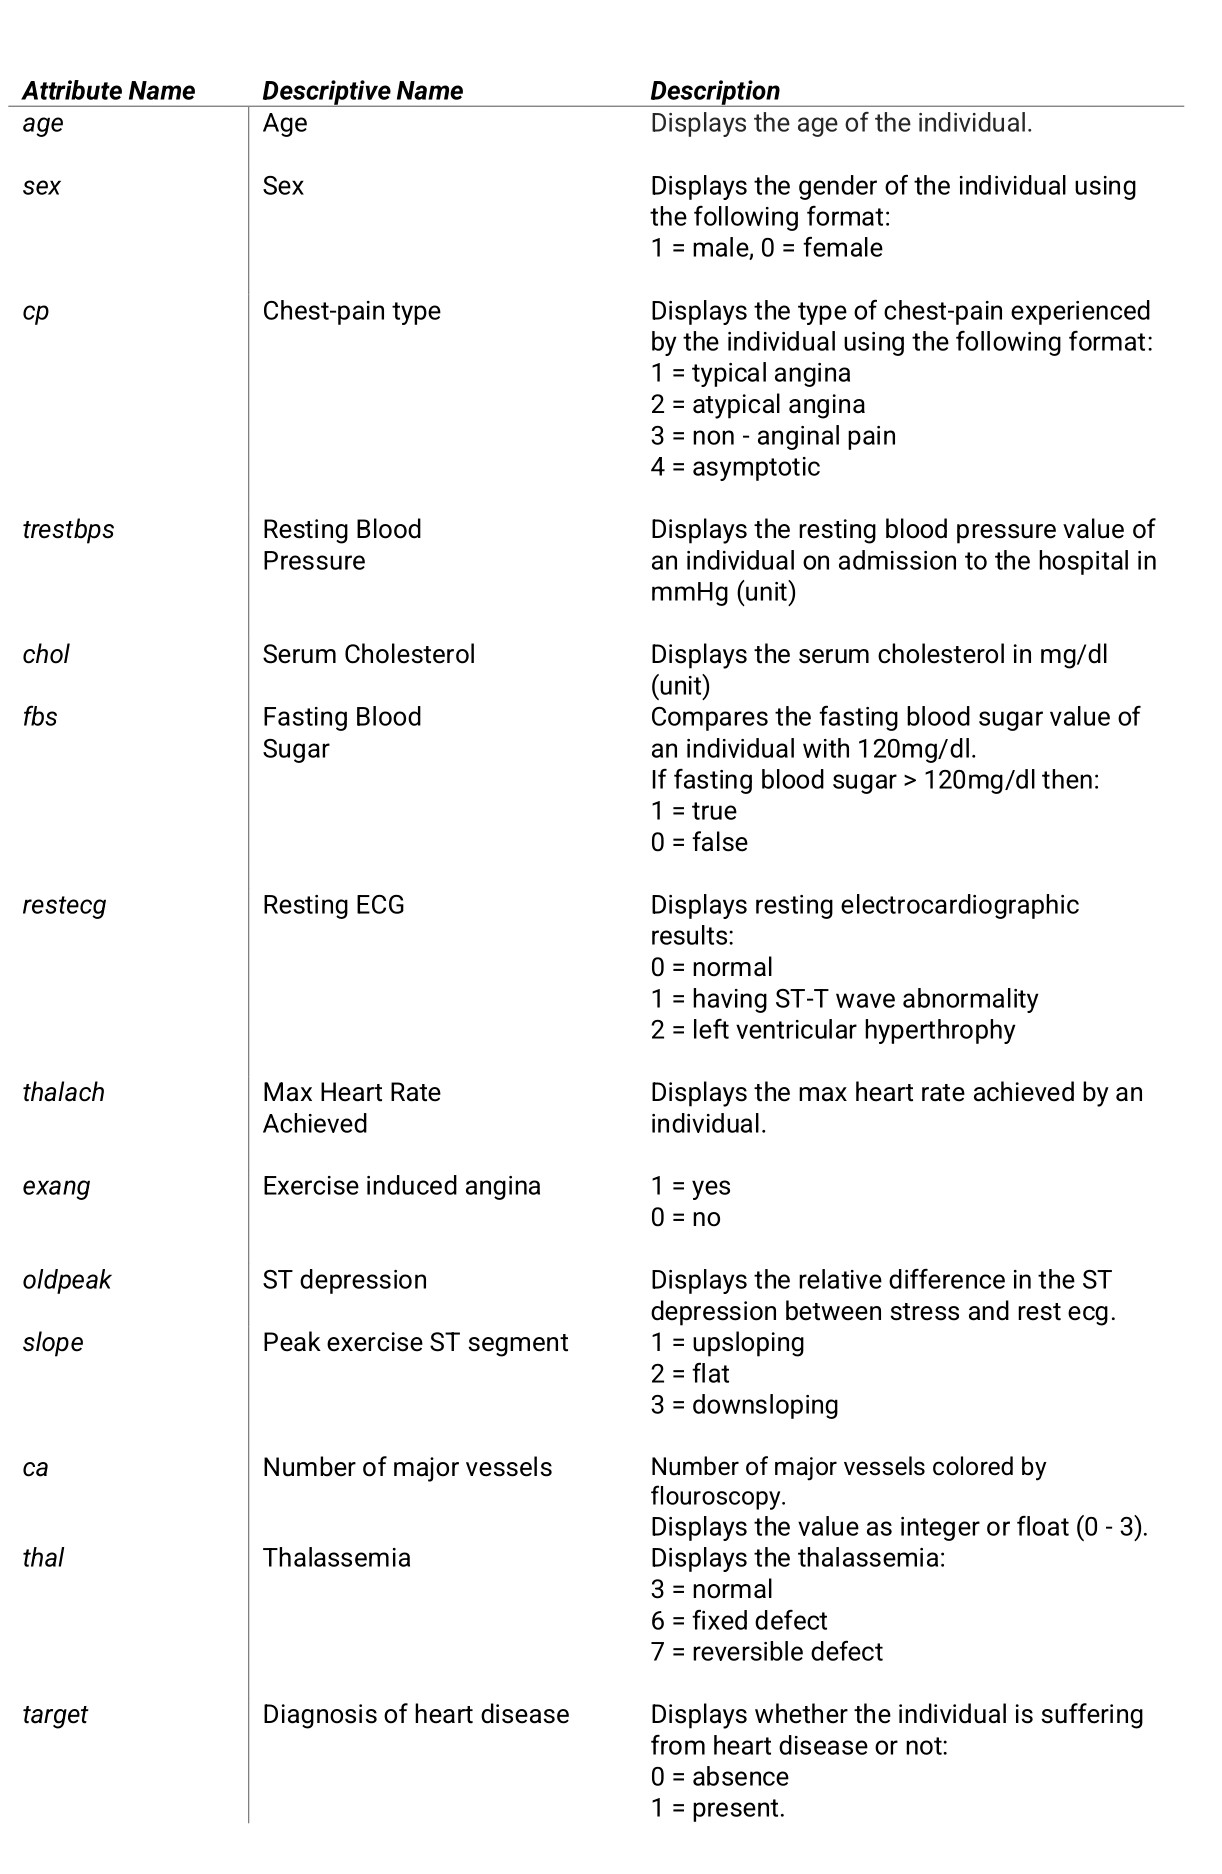

### Detection of Missing Values

In [24]:
#looking for values that do not make sense
df_heart.describe()

age         sex          cp    trestbps        chol         fbs  \
count  920.000000  920.000000  920.000000  861.000000  890.000000  830.000000   
mean    53.510868    0.789130    3.250000  132.132401  199.130341    0.166265   
std      9.424682    0.408146    0.930969   19.066072  110.780891    0.372543   
min     28.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%     47.000000    1.000000    3.000000  120.000000  175.000000    0.000000   
50%     54.000000    1.000000    4.000000  130.000000  223.000000    0.000000   
75%     60.000000    1.000000    4.000000  140.000000  268.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  603.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  918.000000  865.000000  865.000000  858.000000  611.000000  309.000000   
mean     0.604575  137.545670    0.389595    0.878788    1.770867    0.676375   
std      0.805829   25.926287    0.487940    1.091229    0.619258    0.935654   
min      0.000000   60.000000    0.000000   -2.600000    1.000000    0.000000   
25%      0.000000  120.000000    0.000000    0.000000    1.000000    0.000000   
50%      0.000000  140.000000    0.000000    0.500000    2.000000    0.000000   
75%      1.000000  157.000000    1.000000    1.500000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

             thal      target  
count  434.000000  920.000000  
mean     5.087558    0.995652  
std      1.919077    1.142693  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      6.000000    1.000000  
75%      7.000000    2.000000  
max      7.000000    4.000000

In [25]:
#creating a deep copy for 
df_heart2 = df_heart.copy(deep = True)

As can be seen above there are 0s in the columns `trestbps` and `chol` that do not make sense and should be converted to NaN. It is also evident that Switzerland did not test the cholesterol, since there are only 0s in this column.
Also the target column is inconsistent because for some patients the values range from 0 to 1 and for some patients from 0 to 4. The values should be harmonised and therefore, the 2s, 3s and 4s were converted to 1.

In [26]:
#replacing 0s with NaN in columns 'chol' & 'trestbps'. 


#print("# of 0s in chol:", len(df_heart[df_heart["chol"] == 0]))  # 172 zeroes in chol column
df_heart2["chol"] = df_heart2["chol"].replace(0.0, np.nan)


#print("# of 0s in trestbps:", len(df_heart[df_heart["trestbps"] == 0])) # 1 zero in trestbps column
df_heart2["trestbps"] = df_heart2["trestbps"].replace(0.0, np.nan)

# harmonise target column
df_heart2["target"] = df_heart2["target"].replace(2.0, 1.0)
df_heart2["target"] = df_heart2["target"].replace(3.0, 1.0)
df_heart2["target"] = df_heart2["target"].replace(4.0, 1.0)


In [27]:
#getting overview of missing values
print(df_heart2.isnull().sum())
print("shape: ", df_heart2.shape)

location      0
age           0
sex           0
cp            0
trestbps     60
chol        202
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64
shape:  (920, 15)


In [28]:
# calculating the percentage of missing values
column_names = ["#MV"]
missing_values = pd.DataFrame(df_heart2.isnull().sum(), columns = column_names)
missing_values["%MV"] = (missing_values["#MV"] / 920)*100
missing_values


#MV        %MV
location    0   0.000000
age         0   0.000000
sex         0   0.000000
cp          0   0.000000
trestbps   60   6.521739
chol      202  21.956522
fbs        90   9.782609
restecg     2   0.217391
thalach    55   5.978261
exang      55   5.978261
oldpeak    62   6.739130
slope     309  33.586957
ca        611  66.413043
thal      486  52.826087
target      0   0.000000

<AxesSubplot:title={'center':'Finding Null Values Using Heatmap\n'}>

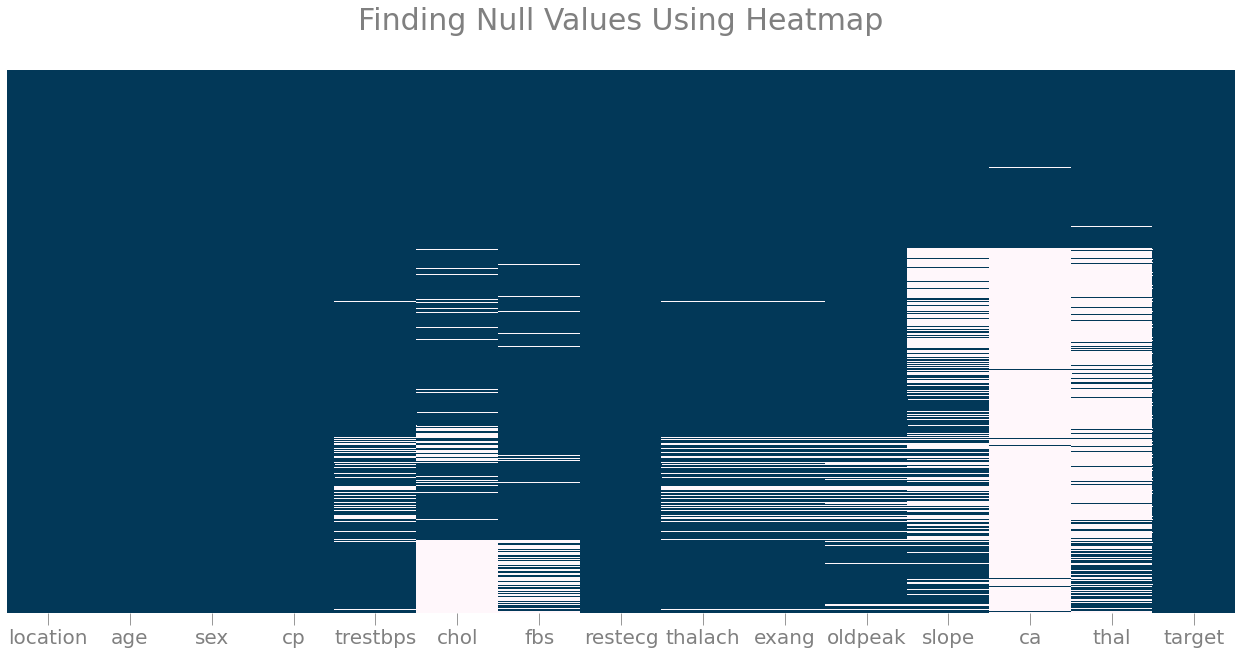

In [29]:
#visualizing missing values 
plt.figure(figsize=(22,10))
plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')
plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)
sns.heatmap(df_heart2.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

In the graph above, the missing values in each column are shown as white lines. The graph clearly shows an abundance of missing values in the columns `ca` and `thal`. It can also be seen that there are quite a few missing values in the `chol` and `slope` columns, which could be a challenge for imputation. 


The attributes `ca` and `thal` have too many missing values in order to perform a reliable imputation. Therefore, these attributes are dropped in order to secure data quality. 

In addition, according to a health professional consultated during the project, the relevance of `ca` and `thal` is neglectible with regard to the occurence of heart diseases.

In [16]:
#dropping columns 'ca' and 'thal'
df_heart2 = df_heart2.drop(["ca", "thal"], axis = 1)

### Flagging of Missing Values

In [17]:
#flagging of missing values
col_list = ["trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope"]

for col in df_heart2.columns:
    if col in col_list:
        df_heart2[col+"_missing"] = df_heart2[col].isnull().astype(int)

In [18]:
#checking data frame after flagging
df_heart2

location   age  sex   cp  trestbps   chol  fbs  restecg  thalach  \
0      Cleveland  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0   
1      Cleveland  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0   
2      Cleveland  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0   
3      Cleveland  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0   
4      Cleveland  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0   
..           ...   ...  ...  ...       ...    ...  ...      ...      ...   
915  Switzerland  70.0  1.0  4.0     115.0    NaN  0.0      1.0     92.0   
916  Switzerland  70.0  1.0  4.0     140.0    NaN  1.0      0.0    157.0   
917  Switzerland  72.0  1.0  3.0     160.0    NaN  NaN      2.0    114.0   
918  Switzerland  73.0  0.0  3.0     160.0    NaN  0.0      1.0    121.0   
919  Switzerland  74.0  1.0  2.0     145.0    NaN  NaN      1.0    123.0   

     exang  ...  slope  target  trestbps_missing  chol_missing  fbs_missing  \
0      0.0  ...    3.0     0.0                 0             0            0   
1      1.0  ...    2.0     1.0                 0             0            0   
2      1.0  ...    2.0     1.0                 0             0            0   
3      0.0  ...    3.0     0.0                 0             0            0   
4      0.0  ...    1.0     0.0                 0             0            0   
..     ...  ...    ...     ...               ...           ...          ...   
915    1.0  ...    2.0     1.0                 0             1            0   
916    1.0  ...    2.0     1.0                 0             1            0   
917    0.0  ...    2.0     0.0                 0             1            1   
918    0.0  ...    1.0     1.0                 0             1            0   
919    0.0  ...    1.0     1.0                 0             1            1   

     restecg_missing  thalach_missing  exang_missing  oldpeak_missing  \
0                  0                0              0                0   
1                  0                0              0                0   
2                  0                0              0                0   
3                  0                0              0                0   
4                  0                0              0                0   
..               ...              ...            ...              ...   
915                0                0              0                0   
916                0                0              0                0   
917                0                0              0                0   
918                0                0              0                0   
919                0                0              0                0   

     slope_missing  
0                0  
1                0  
2                0  
3                0  
4                0  
..             ...  
915              0  
916              0  
917              0  
918              0  
919              0  

[920 rows x 21 columns]

The dataframe df_heart2 was exported as a csv file and used for the imputation in the notebook `healthcare_risk-factors-heart-diseases_data-prep_imputation`.